In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-10-27') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-10-21,118.709999,116.449997,116.669998,116.870003,89946000.0,116.870003
2020-10-22,118.040001,114.589996,117.449997,115.750000,101988000.0,115.750000
2020-10-23,116.550003,114.279999,116.389999,115.040001,82572600.0,115.040001


In [ ]:

df.shape

(2220, 6)

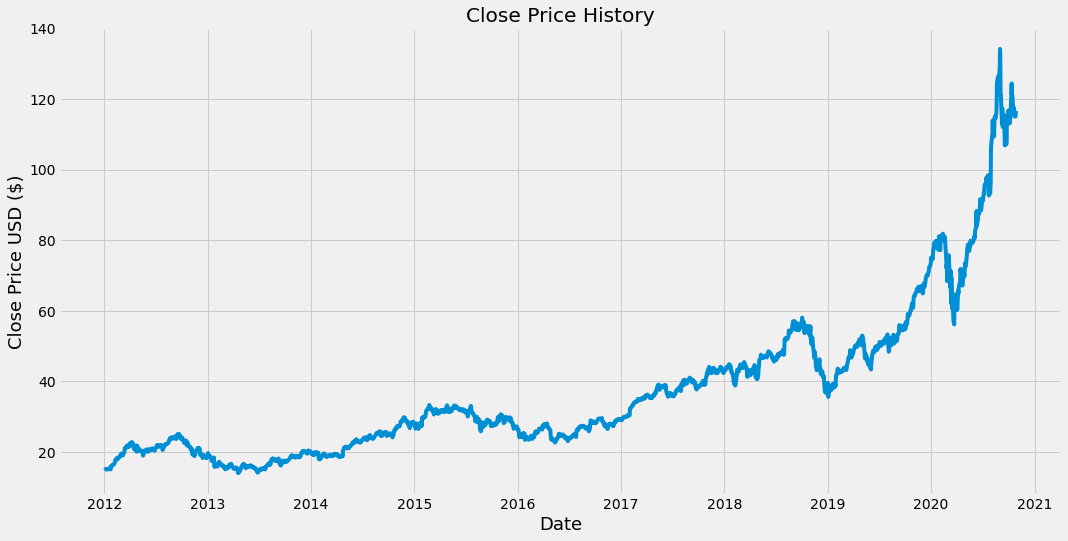

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()


In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 


In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [ ]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , : ]

In [ ]:
#Split the data into x_train and y_train data sets
x_train=[] 
y_train = [] 
for i in range(60,len(train_data)):
   x_train.append(train_data[i-60:i,0])
   y_train.append(train_data[i,0])

In [ ]:

#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:

#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [ ]:

#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics='accuracy')


In [ ]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1,verbose=2)

1716/1716 - 37s - loss: 2.5528e-04 - accuracy: 5.8275e-04


In [ ]:

#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])



In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling



In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.49975923826519

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


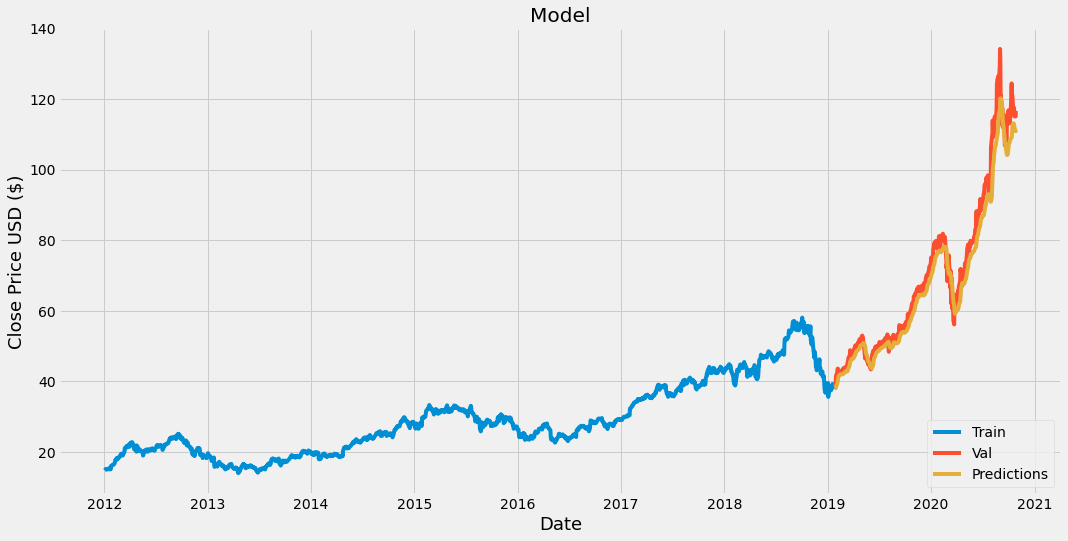

,Close,Predictions
Date,,
2019-01-25,39.439999,37.888283
2019-01-28,39.075001,37.981773
2019-01-29,38.669998,38.077789
2019-01-30,41.312500,38.122787
2019-01-31,41.610001,38.415966
...,...,...
2020-10-21,116.870003,112.477356
2020-10-22,115.750000,112.066017
2020-10-23,115.040001,111.539955


In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


#Show the valid and predicted prices
valid



In [ ]:


#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-11-30')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
pred_price = np.array(pred_price)
pred_price




[[106.027214]]


array([[106.027214]], dtype=float32)

In [ ]:
#for 1 week
i=0
predictions_for_week = []
predictions_for_week = np.append(predictions_for_week,pred_price)
last_59_days = last_60_days[1:,0]

while (i < 5):
  #last 60 days -1 day
  last_59_days_plus_pred = np.append(last_59_days,predictions_for_week).reshape(-1,1)
  #print(last_59_days_plus_pred)
  last_60_days_scaled_ = scaler.transform(last_59_days_plus_pred)
  #Create an empty list
  X_test_ = []
  #Append the past 60 days
  X_test_.append(last_60_days_scaled_)
  #Convert the X_test data set to a numpy array
  X_test_ = np.array(X_test_)
  #Reshape the data
  X_test_ = np.reshape(X_test_, (X_test_.shape[0], X_test_.shape[1], 1))
  #Get the predicted scaled price
  pred_price = model.predict(X_test_)
  #undo the scaling 
  pred_price = scaler.inverse_transform(pred_price)
  predictions_for_week = pred_price
  print(predictions_for_week)
  i= i+1
  last_59_days = last_59_days[1:]
  #print(last_59_days_plus_pred)


#predictions_for_week
#last_59_days,last_59_days_plus_pred

[[105.11799]]
[[105.117905]]
[[105.11775]]
[[105.11754]]
[[105.11731]]


In [ ]:
#for 1 month
i=0
predictions_for_week = []
predictions_for_week = np.append(predictions_for_week,pred_price)
last_59_days = last_60_days[1:,]

while (i < 20):
  #last 60 days -1 day
  last_59_days_plus_pred = np.append(last_59_days,predictions_for_week).reshape(-1,1)
  #print(last_59_days_plus_pred)
  last_60_days_scaled_ = scaler.transform(last_59_days_plus_pred)
  #Create an empty list
  X_test_ = []
  #Append the past 60 days
  X_test_.append(last_60_days_scaled_)
  #Convert the X_test data set to a numpy array
  X_test_ = np.array(X_test_)
  #Reshape the data
  X_test_ = np.reshape(X_test_, (X_test_.shape[0], X_test_.shape[1], 1))
  #Get the predicted scaled price
  pred_price = model.predict(X_test_)
  #undo the scaling 
  pred_price = scaler.inverse_transform(pred_price)
  predictions_for_week = pred_price
  print(predictions_for_week)
  i= i+1
  last_59_days = last_59_days[1:,]
  #print(last_59_days_plus_pred)


#predictions_for_week
#last_59_days,last_59_days_plus_pred

[[105.11626]]
[[105.11772]]
[[105.11773]]
[[105.11754]]
[[105.11731]]
[[105.117065]]
[[105.11676]]
[[105.1164]]
[[105.11599]]
[[105.115524]]
[[105.114975]]
[[105.114365]]
[[105.11364]]
[[105.11277]]
[[105.111664]]
[[105.11036]]
[[105.10891]]
[[105.10709]]
[[105.10499]]
[[105.1022]]


In [ ]:
#for 1 week
i=0
predictions_for_week = []
#predictions_for_week = np.append(predictions_for_week,pred_price)


while (i < 5):
  #last 60 days -1 day
  #last_59_days_plus_pred = np.append(last_59_days,predictions_for_week).reshape(-1,1)
  #print(last_59_days_plus_pred)
  last_60_days_scaled_ = scaler.transform()
  #Create an empty list
  X_test_ = []
  #Append the past 60 days
  X_test_.append(last_60_days_scaled_)
  #Convert the X_test data set to a numpy array
  X_test_ = np.array(X_test_)
  #Reshape the data
  X_test_ = np.reshape(X_test_, (X_test_.shape[0], X_test_.shape[1], 1))
  #Get the predicted scaled price
  pred_price = model.predict(X_test_)
  #undo the scaling 
  pred_price = scaler.inverse_transform(pred_price)
  predictions_for_week = pred_price
  print(predictions_for_week)
  i= i+1
  last_59_days = last_59_days[1:,]
  #print(last_59_days_plus_pred)


#predictions_for_week
#last_59_days,last_59_days_plus_pred

[[105.11626]]
[[105.11772]]
[[105.11773]]
[[105.11754]]
[[105.11731]]
[[105.117065]]
[[105.11676]]
[[105.1164]]
[[105.11599]]
[[105.115524]]
[[105.114975]]
[[105.114365]]
[[105.11364]]
[[105.11277]]
[[105.111664]]
[[105.11036]]
[[105.10891]]
[[105.10709]]
[[105.10499]]
[[105.1022]]


In [ ]:
#for 1 week
i=0
predictions_for_week_p = []
###predictions_for_week = np.append(predictions_for_week,pred_price)
last_59_days = last_60_days[1:,0]
print(last_60_days_p.shape)
while (i <= 5):
  #last 60 days -1 day
  #last_59_days_plus_pred = np.append(last_59_days,predictions_for_week).reshape(-1,1)
  #print(last_59_days_plus_pred)
  #last_60_days_scaled_p = scaler.transform(last_60_days_p).reshape(-1,1)
  #Create an empty list
  X_test_p = []
  #Append the past 60 days
  X_test_p.append(last_60_days_scaled_p)
  #Convert the X_test data set to a numpy array
  X_test_p = np.array(X_test_p)
  #Reshape the data
  X_test_p = np.reshape(X_test_p, (X_test_p.shape[0], X_test_p.shape[1], 1))
  #Get the predicted scaled price
  pred_price_p = model.predict(X_test_p)
  #undo the scaling 
  pred_price_p = scaler.inverse_transform(pred_price_p)
  #predictions_for_week_p = pred_price_p
  predictions_for_week_p = np.append(predictions_for_week_p,pred_price_p)
  #print(predictions_for_week_p)
  i= i+1
  last_59_days_p = last_60_days_p[1:,]
  last_60_days_p =np.append( last_59_days_p,pred_price_p)
  #print(last_59_days_plus_pred)


#predictions_for_week
#last_59_days,last_59_days_plus_pred

(60,)


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-10-21', end='2020-10-27')
print(apple_quote2['Close'])


Date
2020-10-21    116.870003
2020-10-22    115.750000
2020-10-23    115.040001
2020-10-26    115.050003
2020-10-27    116.599998
Name: Close, dtype: float64
